## Task3: Customer Segmentation

In [2]:
import pandas as pd

In [3]:
# Matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load cleaned dataset
df=pd.read_csv('cleaned_customer_churn.csv')

In [13]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Tenure_Segment,Charges_Segment
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,True,False,True,False,False,Low Tenure,Low Charges
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,True,False,False,False,False,True,False,Medium Tenure,Low Charges
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,True,False,False,True,True,Low Tenure,Low Charges
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,True,False,False,False,False,False,False,Medium Tenure,Low Charges
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,True,False,True,False,True,Low Tenure,High Charges


In [5]:
# Segment customers by Tenure
df['Tenure_Segment']=pd.cut(df['tenure'],bins=[0,15,50,75],labels=['Low Tenure','Medium Tenure','High Tenure'])

#### Low Tenure:0-15
#### Medium Tenure:16-50
#### High Tenure:51-75

In [19]:
# Segment customers by monthly charge
Median_charges=df['MonthlyCharges'].median()
df['Charges_Segment']=df['MonthlyCharges'].apply(lambda x: 'Low Charges' if x< median_charges else 'High Charges')

In [10]:
# Churn rate by tenure segment
tenure_churn=df.groupby('Tenure_Segment')['Churn_Yes'].mean()
tenure_churn

C:\Users\diksha tiwari\AppData\Local\Temp\ipykernel_8236\665219866.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn=df.groupby('Tenure_Segment')['Churn_Yes'].mean()


Tenure_Segment
Low Tenure       0.461976
Medium Tenure    0.220827
High Tenure      0.089311
Name: Churn_Yes, dtype: float64

#### Low tenure customers(46.19%),medium tenure customers(22.08%) and high tenure customers(8.93%).This indicates that customers are more likely to churn at early stages of their bond with company

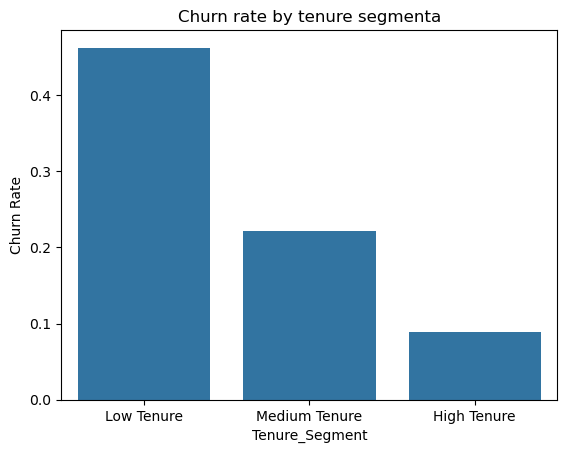

In [11]:
plt.figure()
sns.barplot(x=tenure_churn.index,y=tenure_churn.values)
plt.title('Churn rate by tenure segmenta')
plt.ylabel('Churn Rate')
plt.show()

#### Customer with low tenure has high churn rate,while long term customer are more stable

In [20]:
# Churn rate by charge segment
charge_churn=df.groupby('Charges_Segment')['Churn_Yes'].mean()
charge_churn

Charges_Segment
High Charges    0.351305
Low Charges     0.179312
Name: Churn_Yes, dtype: float64

#### Customer with high monthly charges has 35.13% churn rate and low monthly charges has 17.93% churn rate 

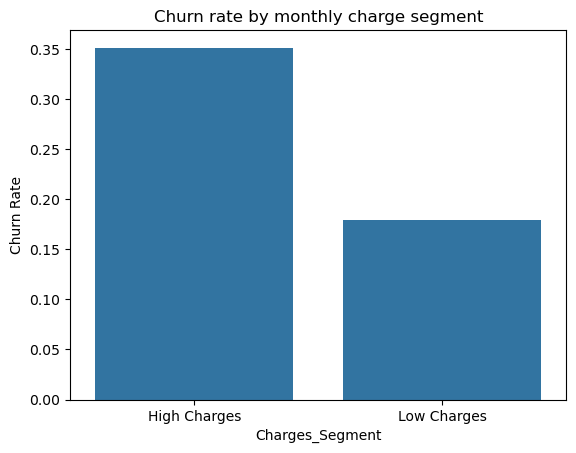

In [21]:
plt.figure()
sns.barplot(x=charge_churn.index,y=charge_churn.values)
plt.title('Churn rate by monthly charge segment')
plt.ylabel('Churn Rate')
plt.show()

#### Customer wit high monthly charge are mostly likely to churn

In [25]:
# churn rate by contract type
contract_churn={'Month-to-Month':df[(df['Contract_One year']==0)&(df['Contract_Two year']==0)]['Churn_Yes'].mean(),
                'One Year':df[df['Contract_One year']==1]['Churn_Yes'].mean(),
                'Two Year':df[df['Contract_Two year']==1]['Churn_Yes'].mean()}

In [26]:
contract_churn_df=pd.DataFrame.from_dict(contract_churn,orient='index',columns=['Churn Rate'])
contract_churn_df

,Churn Rate
Month-to-Month,0.427097
One Year,0.112695
Two Year,0.028319


#### Churn rate is highest for month to month customers(42.70%),for one year(11.26%) and for two years (2.83%) means longer contract duration increase customers retaintion

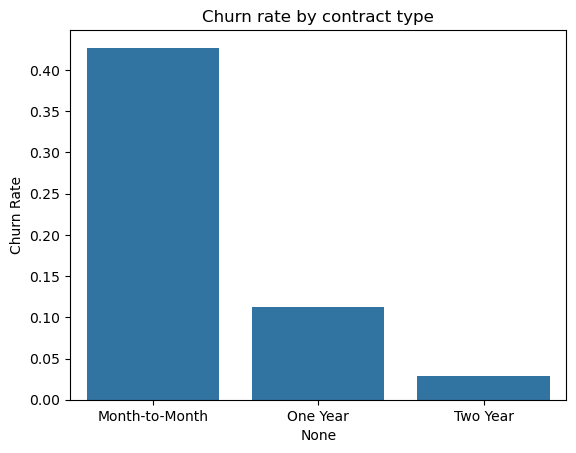

In [27]:
plt.figure()
sns.barplot(x=contract_churn_df.index,y=contract_churn_df['Churn Rate'])
plt.title('Churn rate by contract type')
plt.ylabel('Churn Rate')
plt.show()

#### Month-to-month has high churn rate compared to customer with one year and two year contracts

In [31]:
# Identify high risk customer segent
high_risk_customers=df[(df['Tenure_Segment']=='Low Tenure')&(df['Charges_Segment']=='High Charges')]
high_risk_customers.shape

(962, 33)

#### 962 customers are identified as high risk. These custoer have low teure and high monthly charges, making them more churn.This segment should be priortize by retention. 